# Results 01 - Reproducing HOTS on Simple Alphabet dataset (aka DVS barrel)

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

/home/antoine/homhots/HOTS/HOTS


In [3]:
import pickle
import os
from Network import network
from Tools import histoscore, netparam

In [4]:
record_path = '../Records/EXP_01_LagorceKmeans/'
timestr = '2020-12-01'

# Defining the network and training

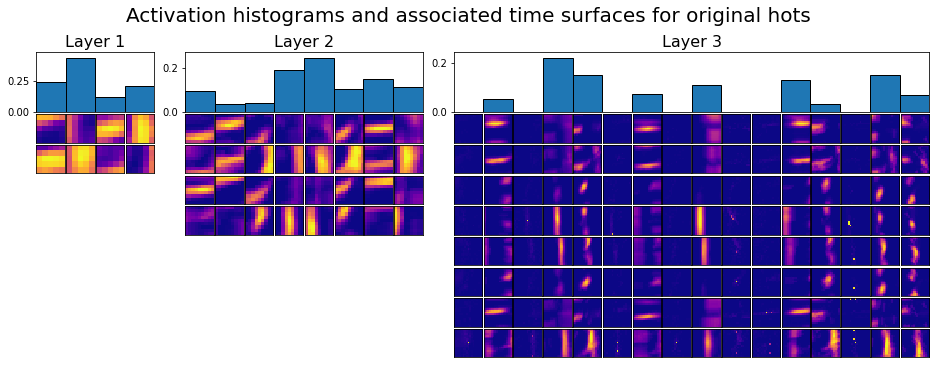

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 98.0% - eucli = 95.0% - norm = 95.0%
Classification scores with entropy: Kullback-Leibler = 92.0% - Jensen-Shannon = 100.0%
Classification scores with k-NN: 3-NN = 35.0% - 6-NN = 12.0%
----------------------------------------------------------------------------------------------------


In [4]:
fname = record_path+"2020-11-26-hots_validation.pkl"
if not os.path.isfile(fname):
    #defining the network
    hots = network(algo='lagorce', krnlinit='first', timestr=timestr)
    #unsupervised clustering
    hots.learninglagorce()
    # learning on training samples
    trainmap = hots.traininglagorce()
    # testing
    testmap = hots.testinglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([hots, trainmap, testmap], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        hots, trainmap, testmap = pickle.load(file)
hots.plotlayer()
acc = histoscore(trainmap, testmap)

# Adding Homeostasis

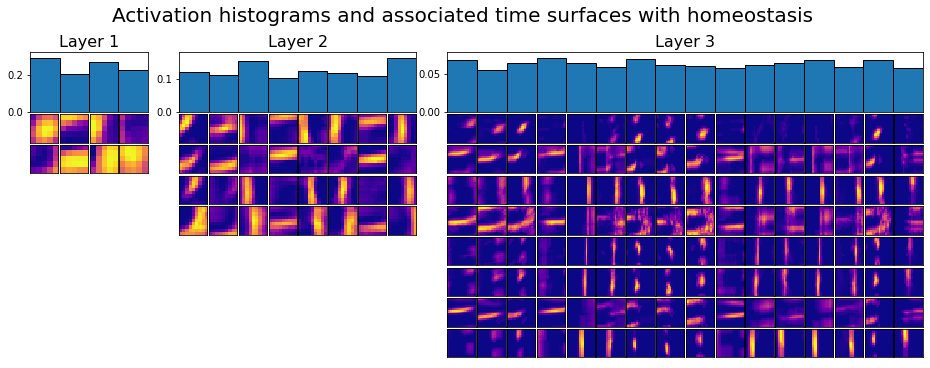

-----------------------------------------------SCORES-----------------------------------------------
Classification scores with HOTS measures: bhatta = 98.0% - eucli = 98.0% - norm = 98.0%
Classification scores with entropy: Kullback-Leibler = 98.0% - Jensen-Shannon = 98.0%
Classification scores with k-NN: 3-NN = 30.0% - 6-NN = 12.0%
----------------------------------------------------------------------------------------------------


In [16]:
fname = record_path+"2020-12-01-hots_homeo_randominit.pkl"
if not os.path.isfile(fname):
    homhots = network(algo='lagorce', krnlinit='rdn', homeo=True)
    homhots.learninglagorce()
    trainmaphom = homhots.traininglagorce()
    testmaphom = homhots.testinglagorce()
    with open(fname, 'wb') as file:
        pickle.dump([homhots, trainmaphom, testmaphom], file, pickle.HIGHEST_PROTOCOL)
else:
    with open(fname, 'rb') as file:
        homhots, trainmaphom, testmaphom = pickle.load(file)
homhots.plotlayer()
acchom = histoscore(trainmaphom, testmaphom)

# Online classification

In [5]:
from Tools import fit_data, predict_data, classification_results
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def fitting(x, a, b):
    #return a*np.tanh(x*b)
    return 1-np.exp(-(b*x)**a)

In [6]:
fname = record_path+"train/2020-12-01_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_36_None_LR.pkl"
if not os.path.isfile(fname):
    histomap = homhots.traininglagorce(outstyle = 'LR')
fname = record_path+"test/2020-12-01_lagorce_rdn_None_True_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_40_None_LR.pkl"
if not os.path.isfile(fname):
    teststream = homhots.testinglagorce(outstyle = 'LR')

In [7]:
fname = record_path+"train/2020-12-01_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_36_None_LR.pkl"
if not os.path.isfile(fname):
    histomap = hots.traininglagorce(outstyle = 'LR')
fname = record_path+"test/2020-12-01_lagorce_first_None_False_[0.25, 1]_[4, 8, 16]_[10.0, 100.0, 1000.0]_[2, 4, 8]_False_40_None_LR.pkl"
if not os.path.isfile(fname):
    teststream = hots.testinglagorce(outstyle = 'LR')

In [9]:
num_workers = 0
learning_rate = 0.005
beta1, beta2 = 0.9, 0.999
betas = (beta1, beta2)
num_epochs = 2 ** 5 + 1
print(f'number of epochs: {num_epochs}')
ds_ev = 1
nbclust = [4, 8, 16]
filt = 2
tau = 10
R = 2
sigma = None
homeinv = None
jitter = None
dataset = 'barrel'
nb_train = 36
nb_test = 40
jitonic = None
tau_cla = 50000
namelist = ['raw', 'homhots']

number of epochs: 33


In [ ]:
for name in namelist:
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_36_40_{ds_ev}.pkl'
    if os.path.isfile(f_name):
        with open(f_name, 'rb') as file:
            likelihood, true_target, time_scale = pickle.load(file)
    else:
        print(f'LR fit for {name}...')
        model, loss  = fit_data(name,timestr,record_path,filt,tau,R,nbclust,sigma,homeinv,jitter,dataset,nb_train, ds_ev,learning_rate,num_epochs,betas,tau_cla,jitonic=jitonic,num_workers=num_workers,verbose=False)
        print(f'prediction for {name}...')
        likelihood, true_target, time_scale = predict_data(model,name,timestr,record_path,filt,tau,R,nbclust,sigma, homeinv, jitter,dataset,nb_test,ds_ev,tau_cla,jitonic=jitonic,num_workers=num_workers, verbose=False)
        with open(f_name, 'wb') as file:
            pickle.dump([likelihood, true_target, time_scale], file, pickle.HIGHEST_PROTOCOL)

LR fit for homhots...
prediction for homhots...


  0%|          | 0/40 [00:00<?, ?it/s]

/home/antoine/homhots/HOTS/HOTS/Tools.py:497: RuntimeWarning: Mean of empty slice
  #_______________________________TO_RUN_HOTS_________________________________________________
/home/antoine/homhots/HOTS/HOTS/Tools.py:497: RuntimeWarning: Mean of empty slice
  #_______________________________TO_RUN_HOTS_________________________________________________


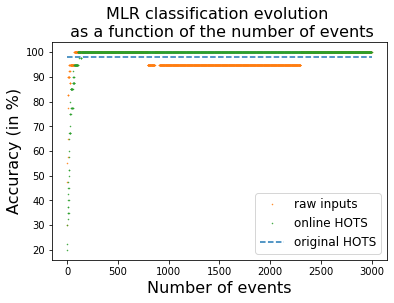

In [35]:
thres = None
colorz = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
legend_list = ['original HOTS', 'raw inputs','online HOTS']
fig_onl, ax_onl = plt.subplots()
ax_onl.hlines(98,0,3000, linestyles='dashed', color=colorz[0], label=legend_list[0])
for namnum, name in enumerate(namelist):
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_{nb_train}_{nb_test}_{ds_ev}.pkl'
    with open(f_name, 'rb') as file:
        likelihood, true_target = pickle.load(file)
    meanac, onlinac, lastac, truepos, falsepos = classification_results(likelihood, true_target, thres, nb_test)
    #pars, cov = curve_fit(f=fitting, xdata=np.arange(len(onlinac)), ydata=onlinac, p0=[1,1], bounds=(-np.inf, np.inf))
    #fit = fitting(np.arange(len(onlinac)), *pars)
    ax_onl.plot(onlinac[:3000]*100, '.', ms=1, color=colorz[namnum+1], label = legend_list[namnum+1]);
    #ax_onl.plot(fit[:3000], linestyle='-', color=color[namnum], linewidth=1);
ax_onl.set_xlabel('Number of events', fontsize=16);
ax_onl.set_ylabel('Accuracy (in %)', fontsize=16);
ax_onl.set_title('MLR classification evolution \n as a function of the number of events', fontsize=16);
ax_onl.legend(fontsize=12);

In [38]:
printfig(fig_onl, 'barrel_online.pdf')

In [ ]:
namelist = ['raw', 'homhots']
for namnum, name in enumerate(namelist):
    f_name = f'{record_path}{timestr}_LR_results_{name}_{nbclust}_{nb_train}_{nb_test}_1.pkl'
    with open(f_name, 'rb') as file:
        likelihood, true_target, time_scale = pickle.load(file)
    nb_classes = 4
    timesteps = np.arange(500,100000,10)
    y_true = np.zeros([len(true_target)])
    y_score = np.zeros([len(true_target),nb_classes])
    proba_timestep = np.zeros([len(timesteps),len(true_target),nb_classes])
    i = 0
    for likelihood_, true_target_, time_scale_ in zip(likelihood, true_target, time_scale):
        time_scale_ -= time_scale_[0]
        previous_ind = 0
        for idx, step in enumerate(timesteps):
            ind = np.where(time_scale_<step)[0][-1]
            proba = np.mean(likelihood_[previous_ind:ind,:], axis=0)
            if np.isnan(proba[0]):
                print(step)
            proba_timestep[idx,i,:] = proba
        i+=1
    AUC = np.zeros([len(timesteps)])
    for idx, step in enumerate(timesteps):
        #print(proba_timestep[idx,:,:].shape, np.array(true_timestep[idx]))
        AUC[idx] = roc_auc_score(LabelBinarizer().fit_transform(np.array(true_target)),proba_timestep[idx,:,:], multi_class='ovr')
    plt.plot(timesteps,AUC, '.', label=name)
    plt.legend()

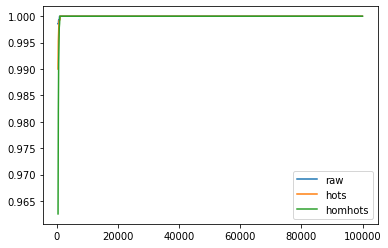

In [18]:
f_name = f'{record_path}{timestr}_LR_results_{nbclust}_{nb_train}_{nb_test}_1_AUC.pkl'
with open(f_name, 'rb') as file:
    results = pickle.load(file)

namelist = ['raw', 'hots', 'homhots']
for namnum, name in enumerate(namelist):
    plt.plot(results[0][0], results[0][namnum+1], label=name)
    plt.legend()